# The response distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from scipy import stats
import seaborn as sns
import pymc as pm
import arviz as az

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


<b> Problem 4.4 <b> 

In Problem 3.2, we plotted a posterior distribution along with a likelihood function.
Repeat parts (a) to (f) of that problem, but instead of using a single value of the measurement xobs,
start with a fixed value of the stimulus, namely s = 10. From this value of s, draw five values of
xobs from the measurement distribution. You should observe that, from trial to trial, the likelihood
function and posterior probability density function both “jump around”, similar to Fig. 4.1.

In [41]:
#stimulus

step = 0.2
S = np.arange(0,40 + step, step)
mean_S = 10
Sd_S = 4
prior = stats.norm.pdf(S, mean_S, Sd_S)

#measurement
s_true = 10
std_x_given_s = 5
x_obs_values = np.random.normal(s_true, std_x_given_s, 5)

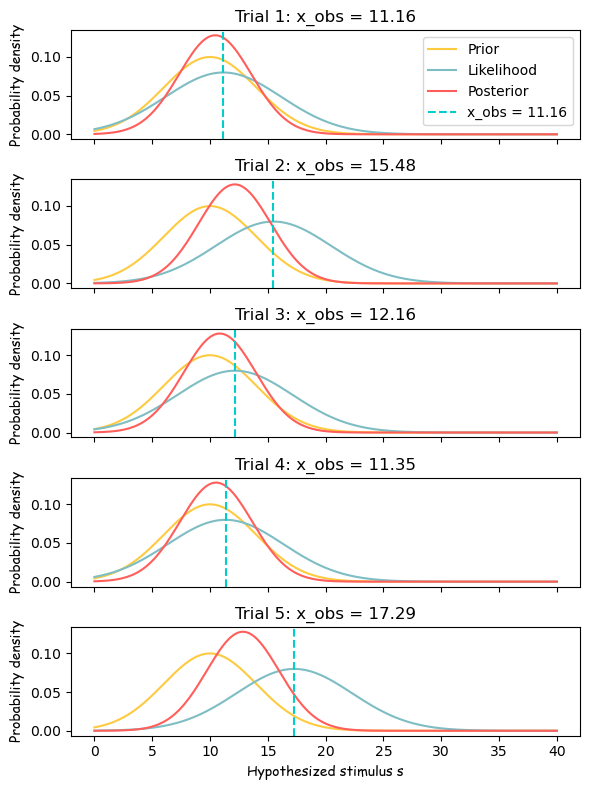

In [48]:
fig, axes = plt.subplots(5, 1, figsize=(6, 8), sharex=True)

for i, x_obs in enumerate(x_obs_values):
    # Step 5: Compute the likelihood for each x_obs
    likelihood = stats.norm.pdf(S, x_obs, std_x_given_s)
    
    # Step 6: Compute the unnormalized posterior
    unnormalized_posterior = likelihood * prior
    
    # Step 7: Normalize the posterior
    posterior = unnormalized_posterior / np.sum(unnormalized_posterior * 0.2)
    plt.style.use('seaborn-v0_8-pastel')
    csfont = {'fontname':'Comic Sans MS'}
    hfont = {'fontname':'Helvetica'}
    color_custom = ['#FF5E5B', '#FDCA40', '#7EBDC3', '#00CECB', '#FFED66']
    # Step 8: Plot prior, likelihood, and posterior
    axes[i].plot(S, prior, label='Prior', color=color_custom[1])
    axes[i].plot(S, likelihood, label='Likelihood', color=color_custom[2])
    axes[i].plot(S, posterior, label='Posterior', color=color_custom[0])
    axes[i].axvline(x_obs, color=color_custom[3], linestyle='--', label=f'x_obs = {x_obs:.2f}')
    axes[i].set_title(f'Trial {i+1}: x_obs = {x_obs:.2f}')
    axes[4].set_xlabel('Hypothesized stimulus s',**csfont)
    axes[i].set_ylabel('Probability density',**csfont)
    axes[0].legend()

plt.tight_layout()
plt.show()

<b> Problem 4.6 <b>

An observer infers a stimulus s from a measurement xobs. As in the chapter, the
measurement distribution p(x|s) is Gaussian with mean s and variance σ2. Unlike in the chapter,
we use the prior
p(s) = e−λs, (4.17)
where λ is a positive constant. This is an improper prior (see Section 3.5.2) but that does not stop
us.
a) Derive an equation for the posterior mean estimate.
b) Derive an equation for the distribution of the posterior mean estimate for given s.

In [107]:
#measurement
step = 0.2
S = np.arange(0,40 + step, step)
xobs = 20
sd = 5
likelihood = stats.norm.pdf(S, xobs, sd)
l = 0.1
prior = np.exp(-l * S)

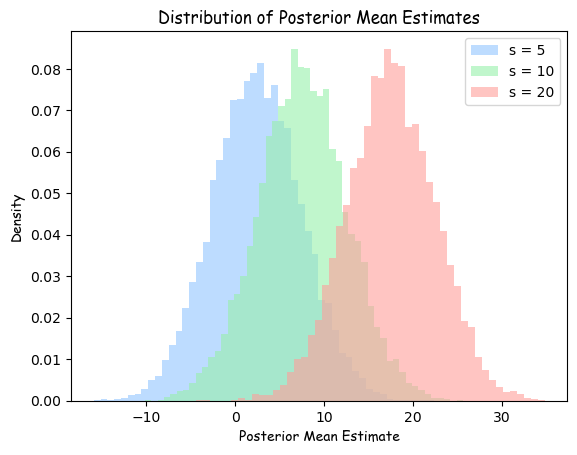

In [108]:
s_values = np.array([5, 10, 20])  
num_samples = 10000  

posterior_means = {}
plt.style.use('seaborn-v0_8-pastel')
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}
color_custom = ['#FF5E5B', '#FDCA40', '#7EBDC3', '#00CECB', '#FFED66']
for s in s_values:
    # Draw samples from the measurement distribution N(s, sd^2)
    xobs_samples = np.random.normal(s, sd, num_samples)
    # Calculate posterior mean estimates for each sample
    # we have a shift (reade section 3.5.2)
    posterior_mean_samples = xobs_samples - (l * sd**2)
    posterior_means[s] = posterior_mean_samples

    plt.hist(posterior_mean_samples, bins=50, density=True, alpha=0.6, label=f's = {s}')

# Plot settings
plt.xlabel('Posterior Mean Estimate',**csfont)
plt.ylabel('Density',**csfont)
plt.title('Distribution of Posterior Mean Estimates',**csfont)
plt.legend()
plt.show()

<b> Problem 4.7 <b>

We define relative bias as the ratio between bias and the difference between the mean
of the stimulus distribution and the true stimulus.

    a) For the posterior mean estimate, derive an expression for relative bias as a function of the ratio R ≡ σ/σs.
    b) Plot relative bias as a function of R.
    c) Does this plot show what you would expect from the Bayesian observer? Explain intuitively.

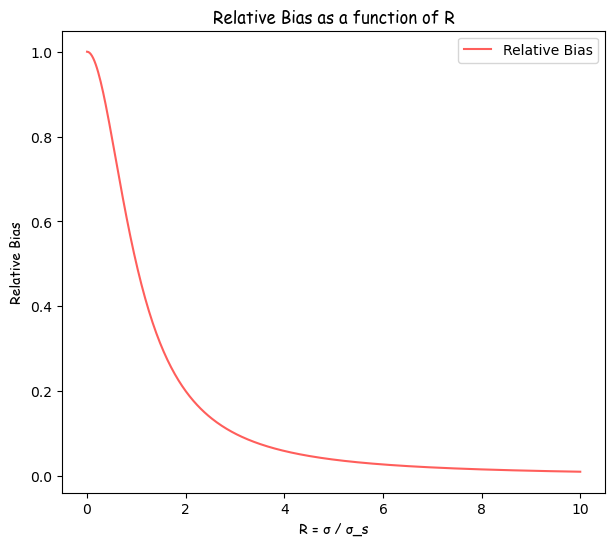

In [11]:

def relative_bias(R):
    return 1 / (1 + R**2)

R_values = np.linspace(0, 10, 400)
relative_bias_values = relative_bias(R_values)

plt.style.use('seaborn-v0_8-pastel')
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}
color_custom = ['#FF5E5B', '#FDCA40', '#7EBDC3', '#00CECB', '#FFED66']
plt.figure(figsize=(7, 6))
plt.plot(R_values, relative_bias_values, label='Relative Bias', color = color_custom[0])
plt.xlabel('R = σ / σ_s',**csfont)
plt.ylabel('Relative Bias',**csfont)
plt.title('Relative Bias as a function of R',**csfont)
plt.grid(False)
plt.legend()
plt.show()

<b> Explanation <b>
    
The plot should show that as the ratio R (which represents the relative uncertainty of the stimulus distribution to the noise) increases, the relative bias decreases. Intuitively, this means that as the noise in the observation becomes much larger compared to the uncertainty in the stimulus distribution (i.e., when R is large), the bias of the Bayesian observer's estimate decreases, approaching zero. This aligns with the Bayesian principle where the posterior estimate relies more heavily on the prior when the likelihood is less informative.
    
    ------------------------------------------------------------------------------------------------------------------
    
 lets have a example in real life..
    if the variance or uncertainity about a given stimulus goes up, we couldnt be sure about our inference. Thats why, our bias
    goes down.

<b> Problem 4.10 <b>

In this problem, we will numerically compare the properties of the MAP and MLE
estimators. Refer to Section 4.5 and the parameter settings in Fig. 4.3.
    
    a) Reproduce Fig. 4.3A using 1000 trials.
    b) Reproduce the MLE and PME curves in Fig. 4.3B by plotting the corresponding mathematical expressions.
    c) For each of the three noise levels, simulate s on 10,000 trials. For each s, compute the squared bias and the variance of
    the PME using the expressions from (b). Add the two quantities tovobtain the stimulus-conditioned MSE. Average across all
    values of s that you drew to obtain the overall MSE of the posterior mean estimate. The resulting values should be close to
    the PME-related numbers (12.8, 32.0, 51.2) in Fig. 4.3B.

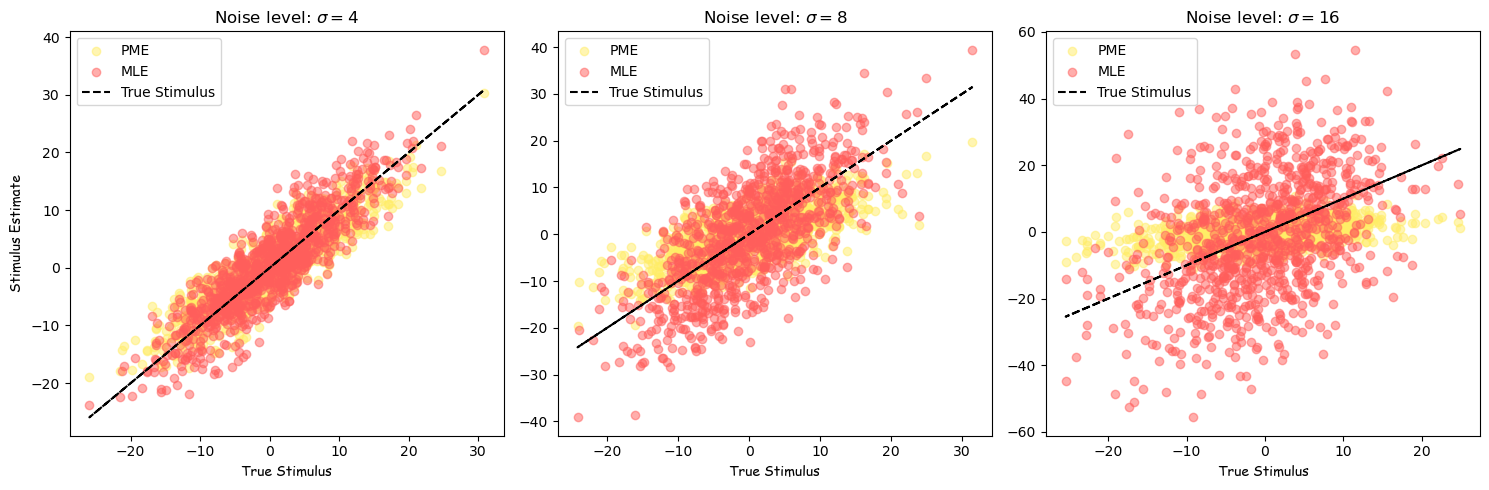

In [86]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
mu = 0
sigma_s = 8
noise_levels = [4, 8, 16]
num_trials = 1000

# Set random seed for reproducibility
np.random.seed(42)

# Plot settings
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, sigma in enumerate(noise_levels):
    # Generate stimulus values
    s = np.random.normal(mu, sigma_s, num_trials)
    
    # Generate noisy measurements
    noisy_measurements = s + np.random.normal(0, sigma, num_trials)
    
    # MLE: MLE is equal to the measurement distribution
    mle_estimate = noisy_measurements
    
    # PME: posterior mean estimate
    precision = 1/sigma**2 #like friston notion i guess
    precision_s = 1/sigma_s**2
    pme = (precision*noisy_measurements + precision_s*mu)/(precision + precision_s)
   
    
    plt.style.use('seaborn-v0_8-pastel')
    csfont = {'fontname':'Comic Sans MS'}
    hfont = {'fontname':'Helvetica'}
    color_custom = ['#FF5E5B', '#FDCA40', '#7EBDC3', '#00CECB', '#FFED66']
    # Scatter plot
    axes[i].scatter(s, pme, color=color_custom[4], alpha=0.5, label='PME')
    axes[i].scatter(s, mle_estimate, color=color_custom[0], alpha=0.5, label='MLE')
    axes[i].plot(s, s, 'k--', label='True Stimulus')
    #axes[i].plot(mle_estimate, mle_estimate, 'k--', label='MLE', color = color_custom[0])
    #axes[i].plot(pme, pme, 'k--', label='PME', color = 'black')
    axes[i].set_title(f'Noise level: $\\sigma = {sigma}$')
    axes[i].set_xlabel('True Stimulus',**csfont)
    axes[0].set_ylabel('Stimulus Estimate',**csfont)
    axes[i].legend()

plt.tight_layout()
plt.show()


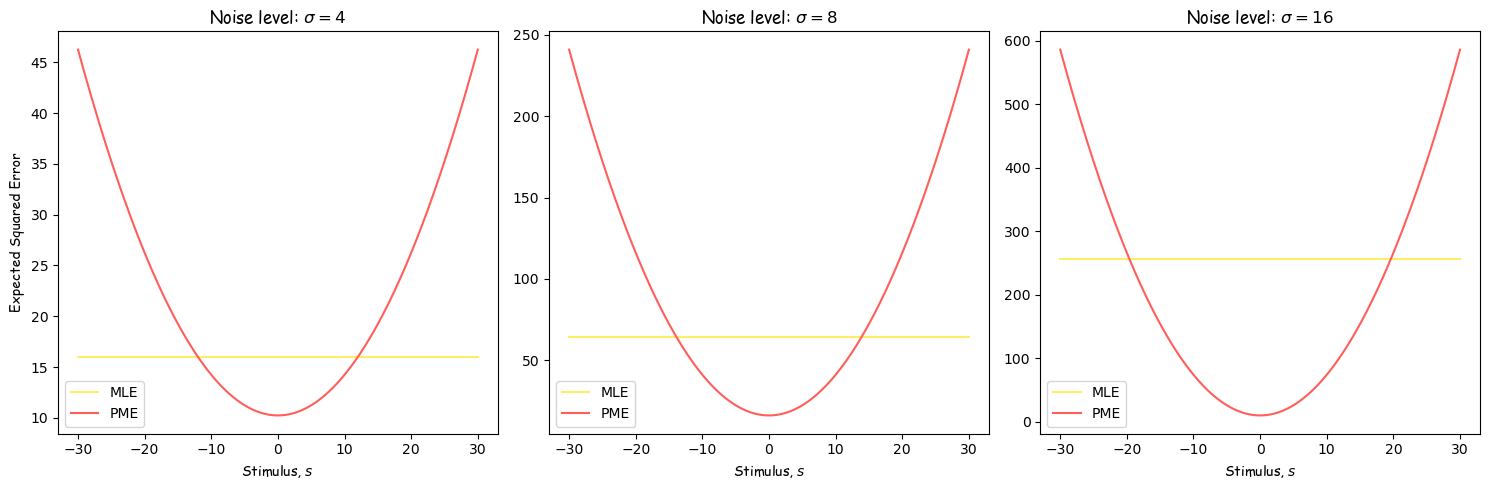

In [99]:
#Part b

# Define parameters
mu = 0
sigma_s = 8
noise_levels = [4, 8, 16]

# Define functions to calculate MSE
def mse_mle(s, sigma):
    return sigma**2
    

def mse_pme(s, sigma, sigma_s):
    precision = 1/sigma**2 #like friston notion i guess
    precision_s = 1/sigma_s**2
    return ((precision_s**2/(precision + precision_s)**2)* (s - mu)**2) + (precision/(precision + precision_s)**2)

# Generate stimulus values
s_values = np.linspace(-30, 30, 1000)

# Plot settings
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, sigma in enumerate(noise_levels):
    # Calculate MSE for MLE and PME
    mse_mle_values = mse_mle(s_values, sigma)
    mse_pme_values = mse_pme(s_values, sigma, sigma_s)
    
    plt.style.use('seaborn-v0_8-dark-palette')
    csfont = {'fontname':'Comic Sans MS'}
    hfont = {'fontname':'Helvetica'}
    color_custom = ['#FF5E5B', '#FDCA40', '#7EBDC3', '#00CECB', '#FFED66']
    # Plot MSE curves
    axes[i].plot(s_values, mse_mle_values * np.ones_like(s_values), label='MLE', color=color_custom[4])
    axes[i].plot(s_values, mse_pme_values, label='PME', color=color_custom[0])
    axes[i].set_title(f'Noise level: $\\sigma = {sigma}$',**csfont)
    axes[i].set_xlabel('Stimulus, $s$',**csfont)
    axes[0].set_ylabel('Expected Squared Error',**csfont)
    axes[i].legend()

plt.tight_layout()
plt.show()


In [106]:
#Part C

num_trials = 10000
overall_mse_pme = []

for sigma in noise_levels:
    # Generate stimulus values
    s = np.random.normal(mu, sigma_s, num_trials)
    
    # Compute PME estimates
    precision = 1/sigma**2 #like friston notion i guess
    precision_s = 1/sigma_s**2
    pme_estimate = (precision*noisy_measurements + precision_s*mu)/(precision + precision_s)
    
    
    # Compute stimulus-conditioned MSE
    precision = 1/sigma**2 
    precision_s = 1/sigma_s**2
    mse_pme = ((precision_s**2/(precision + precision_s)**2)* (s - mu)**2) + (precision/(precision + precision_s)**2)
    
    
    # Compute overall MSE by averaging across all trials
    overall_mse_pme.append(np.mean(mse_pme))

# Print the results
print("Overall MSE of PME for each noise level:")
for i, sigma in enumerate(noise_levels):
    print(f"Noise level {sigma}: {overall_mse_pme[i]}")

Overall MSE of PME for each noise level:
Noise level 4: 12.849214882790353
Noise level 8: 31.806172185756477
Noise level 16: 50.5130063294288


<b> Problem 4.16 <b>

In this problem, we fit and compare models on synthetic data from a continuous
estimation task. Read Appendix C if you are not familiar with model fitting and model comparison.
Download estimation.csv from https://osf.io/84kpb. The rows correspond to trials (500 trials in
total). The first column contains the values of the presented stimulus, the second column the
subject’s estimates of the stimulus.
    

    a) Plot the data in a scatter plot of estimate against stimulus, using black dots. Draw a dashed
    black line to indicate the diagonal. Choose your axis ranges suitably. Label the axes.

    b) By eye, would you say that the observer is doing maximum-likelihood estimation or is taking
    into account a prior? Why?

    
We now fit two models to the data. In both models, we assume that the observer’s measurement
follows a Gaussian distribution with mean equal to the true stimulus and unknown standard deviation
σ. We also assume that all trials are independent.
    
    
    c) Model 1 states that the observer performs maximum-likelihood estimation. Under this model,
    write down an equation for the log likelihood function over σ in terms of the stimuli s1,...,sn
    and the estimates ˆ s1,...,sˆn. Simplify as much as possible.
    d) Plot the log likelihood function of σ on a grid from 0.1 to 10 in steps of 0.02.
    e) On this grid, what is the maximum-likelihood estimate of σ?
    f) As an alternative to the grid search, use a built-in optimization algorithm to find the maximumlikelihood estimate of σ.
    Justify the algorithm that you chose. 
    g) Model 2 states that the observer performs posterior mean estimation using a Gaussian prior with mean 0 and unknown
     standard deviation σprior. Under this model, write down an equation for the log likelihood function of the combination
    (σ,σprior). Simplify as much as possible.
    h) Using grids from 0.1 to 10 in steps of 0.02 for both σ and σprior, plot the log likelihood
    function as a heat map. Add a color legend. Label the axes; make sure to check which axis corresponds to which variable.
    i) On this grid, what are the maximum-likelihood estimates of σ and σprior?
    j) Use a built-in optimization algorithm to find the maximum-likelihood estimates of σ and σprior.
    k) Which model wins according to AIC?
    l) Which model wins according to BIC?

In [3]:
#read the data

df = pd.read_csv("D:/Baysian models of perception and action/appendixC6_estimation_s.csv", header=None)
df2 = pd.read_csv("D:/Baysian models of perception and action/appendixC6_estimation_s_hat.csv", header=None)
#what i got from the question is: even numbers (index 0 2 4 ..) 
#for value of presented stimulus and odd numbers (index 1, 3, 5, ..) for estimation
values = df.iloc[0].values
values_s_hat = df2.iloc[0].values

# Create a new DataFrame with the extracted values
processed_data = pd.DataFrame({
    'Stimulus': values,
    'Estimate': values_s_hat
})

In [4]:
processed_data.describe()

,Stimulus,Estimate
count,500.000000,500.000000
mean,0.070425,0.102456
std,3.055870,3.370292
min,-9.021500,-10.802000
25%,-2.007650,-2.146175
50%,0.057715,0.183550
75%,2.115975,2.462950
max,11.020000,12.459000


<Axes: xlabel='Stimulus', ylabel='Estimate'>

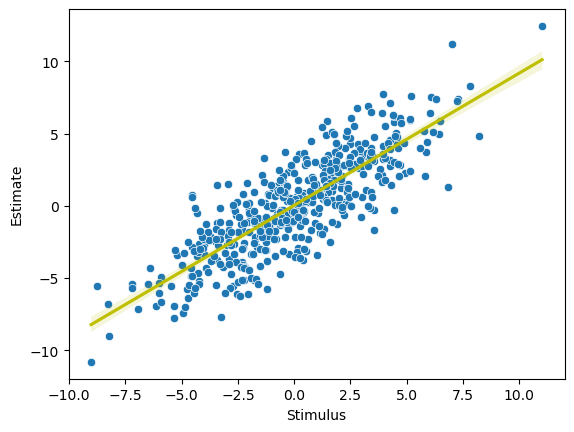

In [64]:
#Part a

sns.scatterplot(x = processed_data['Stimulus'], y = processed_data['Estimate']) #hue= df_to_scat['Session'] )
sns.regplot(x= processed_data['Stimulus'], y= processed_data['Estimate'],scatter=False, line_kws={"color": "y"})

part b

mmm, yes for now

In [65]:
#part c

#Analytical calculation: based on formula in page 324
n_trial = 500
sigma = np.sqrt((1/n_trial) * np.sum(processed_data['Estimate'] - processed_data['Stimulus'])**2)
print(sigma)


0.7162298222215611


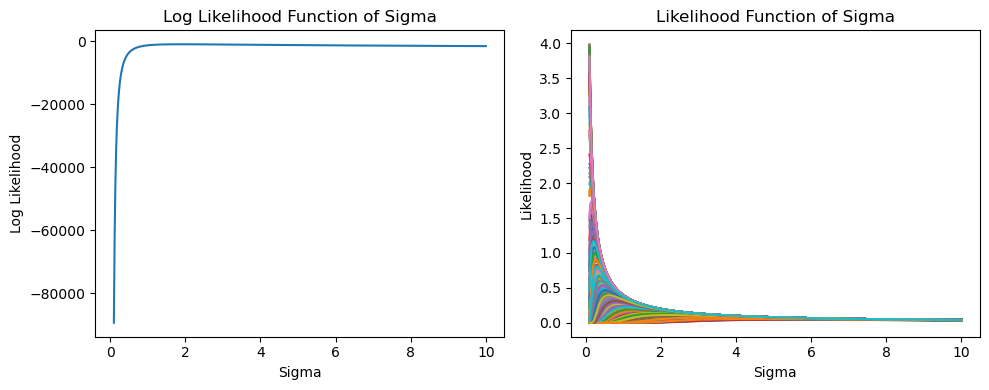

In [22]:
#part d: Grid search

step = 0.02
sigma_values = np.arange(0.1,10 + step, step)
estimates = processed_data['Estimate']
stimuli = processed_data['Stimulus']
n = 500
def log_likelihood(sigma, stimuli, estimates):
    #if sigma <= 0:
        #return -np.inf  # log likelihood is negative infinity for non-positive sigma
    #return -n/2 * np.log(2 * np.pi * sigma**2) - 1/(2 * sigma**2) * np.sum((estimates - stimuli)**2)
    return -n/2 * np.log(2 * np.pi * sigma**2) - np.sum((estimates - stimuli)**2)/(2 * sigma**2)

def likelihood(sigma, stimuli, estimates):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((estimates - stimuli) / sigma) ** 2)

log_likelihood_values_model1 = [log_likelihood(sigma, stimuli, estimates) for sigma in sigma_values]
likelihood_values = [likelihood(sigma, stimuli, estimates) for sigma in sigma_values]


# Plotting
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(sigma_values, log_likelihood_values_model1, label='Log Likelihood')
plt.xlabel('Sigma')
plt.ylabel('Log Likelihood')
plt.title('Log Likelihood Function of Sigma')



plt.subplot(1, 2, 2)
plt.plot(sigma_values, likelihood_values, label='Likelihood')
plt.xlabel('Sigma')
plt.ylabel('Likelihood')
plt.title('Likelihood Function of Sigma')

plt.tight_layout()
plt.grid(False)
plt.show()

In [23]:
max_likelihood_index = np.argmax(log_likelihood_values_model1)
max_likelihood_sigma = sigma_values[max_likelihood_index]

max_likelihood_sigma

1.9000000000000004

In [14]:
#part f
import scipy.optimize as opt

# Function to calculate the negative log likelihood for a given sigma
def neg_log_likelihood(sigma, stimuli, estimates):
    #return n/2 * np.log(2 * np.pi * sigma**2) + 1/(2 * sigma**2) * np.sum((estimates - stimuli)**2)
    return n/2 * np.log(2 * np.pi * sigma**2) + np.sum((estimates - stimuli)**2)/(2 * sigma**2)
    

# Initial guess for sigma
initial_sigma = 0.1

# Perform the optimization
result = opt.minimize(neg_log_likelihood, initial_sigma, args=(stimuli, estimates), method = 'BFGS')
max_likelihood_sigma = result.x[0]

result2 = opt.minimize(neg_log_likelihood, initial_sigma, args=(stimuli, estimates), method = 'CG')
max_likelihood_sigma2 = result2.x[0]

In [15]:
max_likelihood_sigma

1.898063627635498

In [16]:
max_likelihood_sigma2

1.11

In [27]:
#part g
# Function to calculate the negative log likelihood for a given combination of sigma and sigma_prior
n = 500

def neg_log_likelihood_combination(params, stimuli, estimates):
    sigma, sigma_prior = params
    if sigma <= 0 or sigma_prior <= 0:
        return np.inf
    term1 = n/2 * np.log(2 * np.pi * sigma**2) + 1/(2 * sigma**2) * np.sum((estimates - stimuli)**2)
    #term1 = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(- 0.5 * (np.log(np.sum(estimates- stimuli) / sigma) ** 2))
    
    term2 = n/2 * np.log(2 * np.pi * sigma_prior**2) + 1/(2 * sigma_prior**2) * np.sum(estimates**2)
    #term2 = 1 / (sigma_prior * np.sqrt(2 * np.pi)) * np.exp(-0.5 * (np.log(np.sum(estimates- stimuli) / sigma_prior) ** 2))
                                                        
    return term1 + term2

# Create grids of sigma and sigma_prior values
sigma_values = np.arange(0.1, 10.02, 0.02)
sigma_prior_values = np.arange(0.1, 10.02, 0.02)
log_likelihood_values_model2 = np.zeros((len(sigma_values), len(sigma_prior_values)))

# Calculate log likelihood values for the grid
for i, sigma in enumerate(sigma_values):
    for j, sigma_prior in enumerate(sigma_prior_values):
        log_likelihood_values_model2[i, j] = -neg_log_likelihood_combination([sigma, sigma_prior], stimuli, estimates)
max_likelihood_indices = np.unravel_index(np.argmax(log_likelihood_values), log_likelihood_values.shape)
max_likelihood_sigma = sigma_values[max_likelihood_indices[0]]
max_likelihood_sigma_prior = sigma_prior_values[max_likelihood_indices[1]]

print(f"The maximum-likelihood estimate of sigma is: {max_likelihood_sigma}")
print(f"The maximum-likelihood estimate of sigma_prior is: {max_likelihood_sigma_prior}")
# Plot the heat map
#plt.figure(figsize=(8, 6))
#plt.imshow(log_likelihood_values, extent=[0.1, 10, 0.1, 10], origin='lower', aspect='auto', cmap='viridis')
#plt.colorbar(label='Log Likelihood')
#plt.xlabel('Sigma')
#plt.ylabel('Sigma_prior')
#plt.title('Log Likelihood Function Heat Map')
#plt.show()


The maximum-likelihood estimate of sigma is: 1.9000000000000004
The maximum-likelihood estimate of sigma_prior is: 3.3600000000000008


In [87]:
initial_params = [1.0, 1.0]

# Perform the optimization
result = opt.minimize(neg_log_likelihood_combination, initial_params, args=(stimuli, estimates))
max_likelihood_sigma, max_likelihood_sigma_prior = result.x

print(f"The maximum-likelihood estimate of sigma is: {max_likelihood_sigma}")
print(f"The maximum-likelihood estimate of sigma_prior is: {max_likelihood_sigma_prior}")

The maximum-likelihood estimate of sigma is: 1.898063683873065
The maximum-likelihood estimate of sigma_prior is: 3.3684790899502204


In [37]:
AIC_model1 = -2*(np.argmax(log_likelihood_values_model1) - 1)

AIC_model2= -2*(np.argmax(log_likelihood_values_model2) - 2)


BIC_model1 = -2*(np.argmax(log_likelihood_values_model1) - (1*np.log(500)/2))
BIC_model2 = -2*(np.argmax(log_likelihood_values_model2) - (2*np.log(500)/2))

#Higher AIC or BIC is then interpreted as evidence that a model is worse.

In [45]:
print(f"Model 1 AIC: {AIC_model1}, BIC: {BIC_model1}")
print(f"Model 2 AIC: {AIC_model2}, BIC: {BIC_model2}")

if AIC_model1 < AIC_model2:
    print("Model 1 wins according to AIC")
else:
    print("Model 2 wins according to AIC")

if BIC_model1 < BIC_model2:
    print("Model 1 wins according to BIC")
else:
    print("Model 2 wins according to BIC")

Model 1 AIC: -178, BIC: -173.7853919015778
Model 2 AIC: -89602, BIC: -89593.57078380315
Model 2 wins according to AIC
Model 2 wins according to BIC


<b> Now Lets use PyMC package for building model <b>

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 444 seconds.


        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
sigma  1.904  0.061   1.795    2.028      0.001    0.001    2036.0    3086.0   

       r_hat  
sigma    1.0  


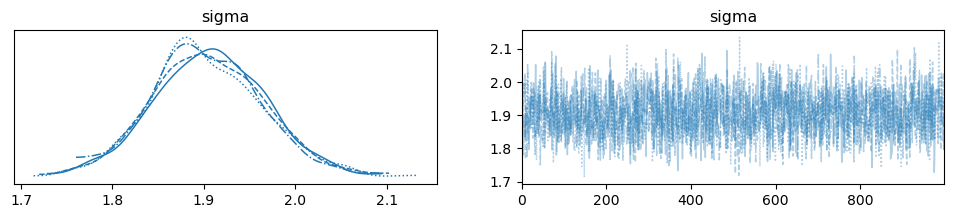

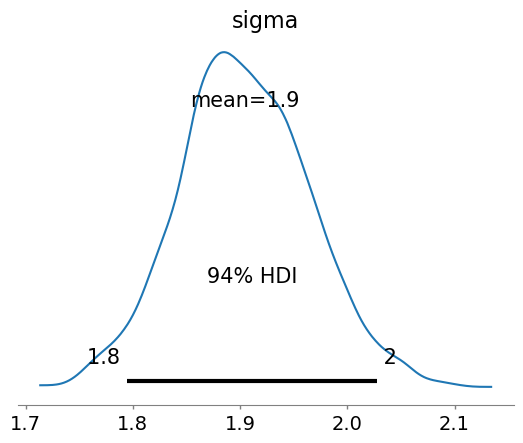

In [6]:

# Define Model 1
estimates = processed_data['Estimate']
stimuli = processed_data['Stimulus']
with pm.Model() as model1:
    # Prior for sigma
    sigma = pm.HalfNormal('sigma', sigma=10)
    
    # Likelihood
    estimates_obs = pm.Normal('estimates_obs', mu=stimuli, sigma=sigma, observed=estimates)
    
    
    # Perform inference
    trace1 = pm.sample(1000, tune=1000, return_inferencedata=True)

# Summarize the trace
print(az.summary(trace1))

# Plot the trace
az.plot_trace(trace1)
plt.show()

# Plot the posterior distribution
az.plot_posterior(trace1)
plt.show()


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, sigma_prior]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1011 seconds.


              mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
sigma        1.902  0.061   1.788    2.012      0.001    0.001    4372.0   
sigma_prior  3.064  0.096   2.883    3.238      0.001    0.001    4372.0   

             ess_tail  r_hat  
sigma          2982.0    1.0  
sigma_prior    2656.0    1.0  


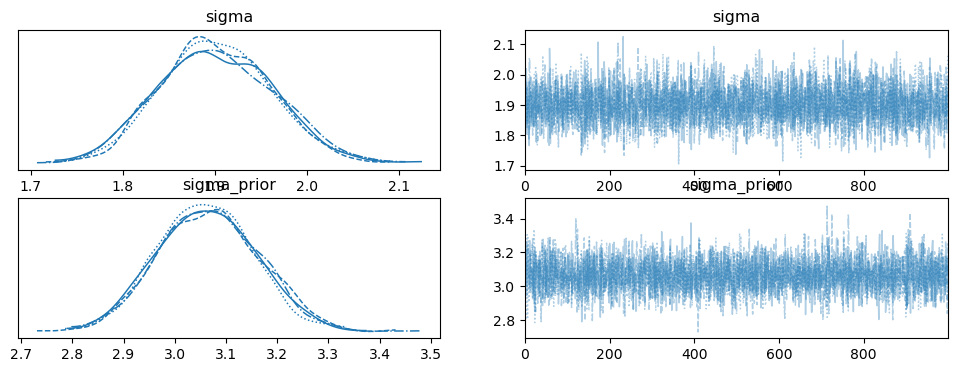

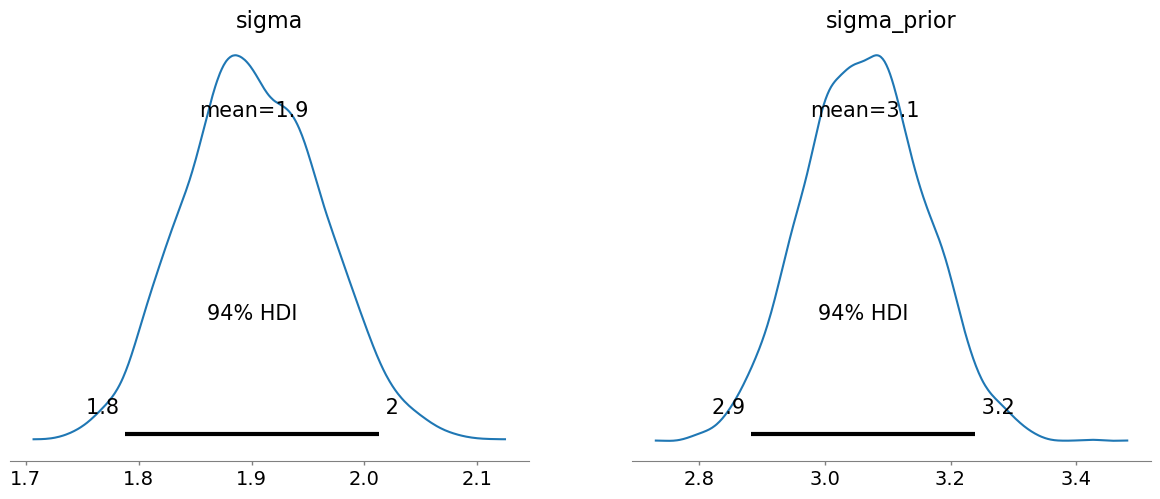

In [7]:
# Define Model 2
with pm.Model() as model2:
    # Priors for sigma and sigma_prior
    sigma = pm.HalfNormal('sigma', sigma=10)
    sigma_prior = pm.HalfNormal('sigma_prior', sigma=10)
    
    # Prior distribution for stimuli (Gaussian with mean 0 and std sigma_prior)
    stimuli_prior = pm.Normal('stimuli_prior', mu=0, sigma=sigma_prior, observed=stimuli)
    
    # Likelihood
    estimates_obs = pm.Normal('estimates_obs', mu=stimuli_prior, sigma=sigma, observed=estimates)
    
    # Perform inference
    trace2 = pm.sample(1000, tune=1000, return_inferencedata=True)

# Summarize the trace
print(az.summary(trace2))

# Plot the trace
az.plot_trace(trace2)
plt.show()

# Plot the posterior distribution
az.plot_posterior(trace2)
plt.show()
